# 표준화, 정규화 

"""

- 표준화 : 데이터 집단 표준편차를 1로 제한 


- 정규화: 모든값이 0~1범위로 오도록 변경 


정규분포

- 정규분포의 경우 표준편차 1.0
- 표준편차와 그래프의 폭이 비례
- 편차: 특정 값 -평균(또는 중앙값)
- 분산: {(특정값-평균)^2 의합계} / 전체 개수
- 표준편차: 분산^(0.5)

"""

# 가설 

어떠한 사실을 설명, 증명 위한 가정

귀무가설 (영가설 , Null Hypothesis, H1)
- 가설검정의 대상이되는 가설
- 대개 기각될 것으로 예상되는 가설

대립가설 ( Anti Hypothesis, H0)
- 가실검정에서 입증하려 하는 가설

가설을 채택(결론으로 선택) or 기각(채택x)하여 논리 전개


귀무가설을 기각하면 제1종오류 (Type I Error ) 
대립가설을 기각하면 제2종오류 (Type 2 Error )

- 유의수준 ( p-value, p, a)

- 제1종오류를 범할 확률
- 귀무가설이 참임에도 불구하고 기각할 확률
- 0.05 cutoff를 주로 사용 


# T - test

- T 분포를 이용한 통계적 검정
- 두그룹간의 차이가 통계적으로 유효한지 확인

T-test의 조건
- 양적 변수
- 정규분포를 따름
- 등분산성 충족

T-test의 정의
- 정규분포를 따르는 모집단



# T - 검정

- T-test의 절차
- 집단 특성 확인
 - 독립표본 -> 아래 절차로 이동
 - 대응표본 -> Paired T-test
-자료의 특성 확인
 - 범주형 -> Mann-Whitney U test
- 연속형일 경우
 - 정규성, 등분산성 만족 ->Student's T-test
 - 정규성 만족,등분산성 불만족 -> Welch's T-test
 - 정규성 불만족 -> Mann-Whitney U test

# 표준화를 통해 이상치를 제거하고, 그 다음 데이터를 정규화 해 상대적 크기에 대한 영향력을 줄인 다음 분석을 시작한다

In [2]:
from sklearn.datasets import load_iris

In [3]:
d = load_iris()         

In [4]:
import pandas as pd

In [5]:
df_iris = pd.DataFrame(data=d.data, columns=d.feature_names)


In [9]:
df_iris['sepcies'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [10]:
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),sepcies
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [7]:
df_iris['sepcies'] = [d.target_names[x] for x in d.target]

In [8]:
df_iris['sepcies']

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: sepcies, Length: 150, dtype: object

In [97]:
df_iris['sepcies'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [98]:
df_iris['sepcies'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: sepcies, dtype: int64

In [99]:
m = df_iris['sepcies'] == 'setosa'
m2 = df_iris['sepcies'] == 'versicolor'

In [100]:
setosa = df_iris[m]['sepal length (cm)']
versicolor = df_iris[m2]['sepal length (cm)']

In [101]:
setosa.mean()

5.006

In [102]:
versicolor.mean()

5.936

In [103]:
from scipy import stats

In [104]:
ttest = stats.ttest_ind(setosa, versicolor)

In [50]:
# T -test의 값들은 서로 차이가 나지 않는다가 T-test의 귀무가설 

In [51]:
ttest.pvalue

8.985235037487079e-18

In [52]:
ttest.statistic        #통계량

-10.52098626754911

In [53]:
stats.shapiro(setosa)    # shapiro =정규성 검사          # pvalue가 0.05가 넘으니 정규성을 확보가 된다 

ShapiroResult(statistic=0.9776982069015503, pvalue=0.4595010578632355)

In [54]:
stats.shapiro(versicolor)

ShapiroResult(statistic=0.9778357148170471, pvalue=0.4647378921508789)

In [55]:
stats.ks_2samp(setosa, versicolor)   # ks_2samp 통계량 계산          # pvalue가 0.05미만이면 상관관계가있다 0.05 넘어가면 상관관계가 없다 

KstestResult(statistic=0.78, pvalue=2.807570962237254e-15, statistic_location=5.4, statistic_sign=1)

In [56]:
stats.wilcoxon(setosa, versicolor)  # 그룹간 중심 비교 

C:\ProgramData\anaconda3\lib\site-packages\scipy\stats\_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


WilcoxonResult(statistic=19.0, pvalue=3.479904217643913e-09)

In [57]:
stats.ttest_rel(setosa, versicolor) # 대응표본 검정 

TtestResult(statistic=-10.145899475747328, pvalue=1.2419145491292472e-13, df=49)

In [58]:
stats.mannwhitneyu(setosa, versicolor) #집단간 평균 비교 

MannwhitneyuResult(statistic=168.5, pvalue=8.34582714594069e-14)

In [59]:
stats.spearmanr(setosa, versicolor) # 상관관계 비교 

SignificanceResult(statistic=-0.1016368495635701, pvalue=0.48247619884195925)

In [106]:
stats.pearsonr(setosa, versicolor)

PearsonRResult(statistic=-0.0808497270175701, pvalue=0.5767425210865983)

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

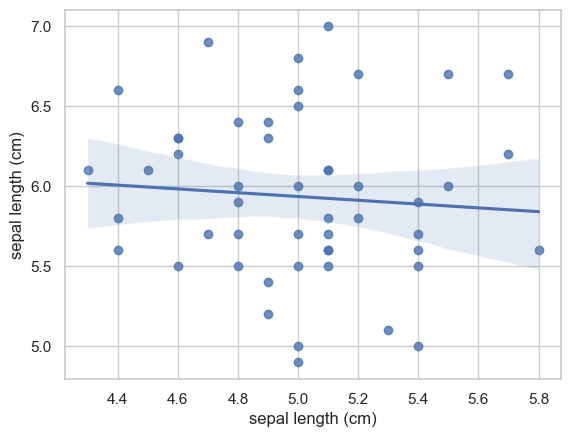

In [108]:
sns.regplot(x= setosa, y= versicolor) # x= y = 명시해줘야함
plt.show()

In [109]:
sns.__version__

'0.12.2'

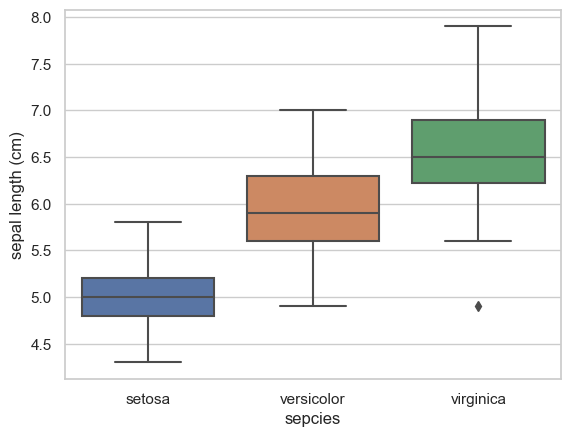

In [110]:
sns.boxplot(data= df_iris, x='sepcies', y='sepal length (cm)')      # pvalue가 0.05
plt.show()

In [111]:
# matplotlib이 기본으로 많이쓰이지만 seaborn 이 matplotlib기반으로 동작하지만 디자인요소와 통계차트를 보기쉬움

In [112]:
%matplotlib inline 

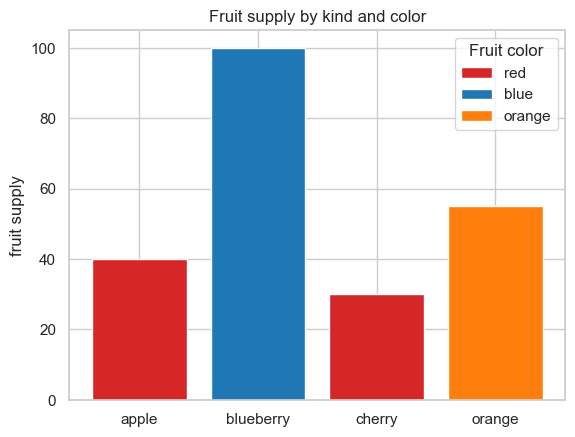

In [113]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()          # fig는 그래프 ax 그래프가그려지는 칸



fruits = ['apple', 'blueberry', 'cherry', 'orange']
counts = [40, 100, 30, 55]
bar_labels = ['red', 'blue', '_red', 'orange']
bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

ax.bar(fruits, counts, label=bar_labels, color=bar_colors)     # plt요소가 ax에 할당됨

ax.set_ylabel('fruit supply')
ax.set_title('Fruit supply by kind and color')
ax.legend(title='Fruit color')

plt.show()

<BarContainer object of 4 artists>

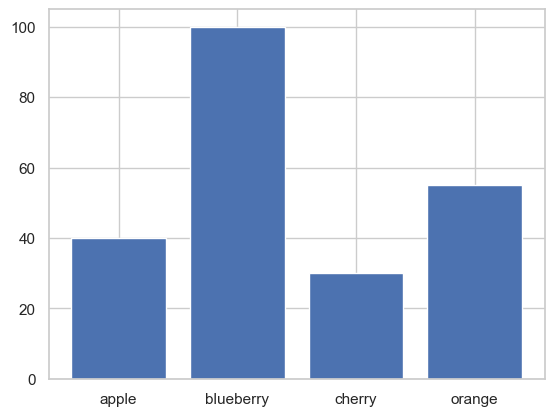

In [114]:
plt.bar(fruits, counts)

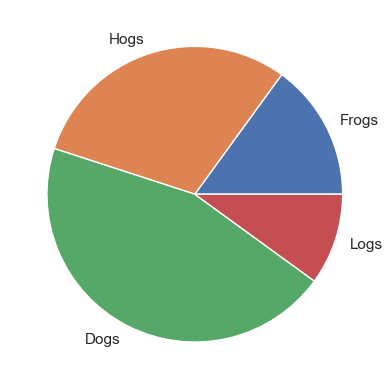

In [115]:
import matplotlib.pyplot as plt
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)
plt.show()

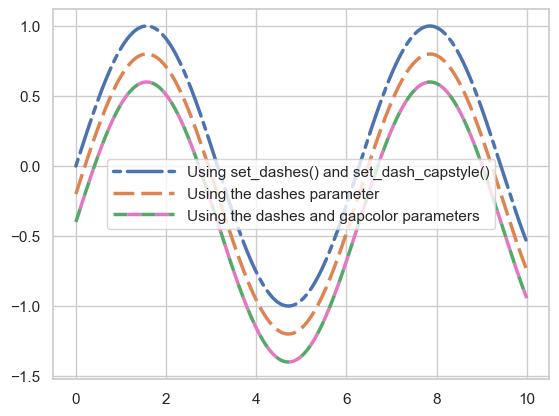

In [116]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 500)
y = np.sin(x)

plt.rc('lines', linewidth=2.5)
fig, ax = plt.subplots()

# Using set_dashes() and set_capstyle() to modify dashing of an existing line.
line1, = ax.plot(x, y, label='Using set_dashes() and set_dash_capstyle()')
line1.set_dashes([2, 2, 10, 2])  # 2pt line, 2pt break, 10pt line, 2pt break.
line1.set_dash_capstyle('round')

# Using plot(..., dashes=...) to set the dashing when creating a line.
line2, = ax.plot(x, y - 0.2, dashes=[6, 2], label='Using the dashes parameter')

# Using plot(..., dashes=..., gapcolor=...) to set the dashing and
# alternating color when creating a line.
line3, = ax.plot(x, y - 0.4, dashes=[4, 4], gapcolor='tab:pink',
                 label='Using the dashes and gapcolor parameters')

ax.legend(handlelength=4)
plt.show()

In [117]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.100000,18.700000,181.000000,3750.000000,Male
1,Adelie,Torgersen,39.500000,17.400000,186.000000,3800.000000,Female
2,Adelie,Torgersen,40.300000,18.000000,195.000000,3250.000000,Female
3,Adelie,Torgersen,3733.088235,3733.088235,3733.088235,3733.088235,3733.088235
4,Adelie,Torgersen,36.700000,19.300000,193.000000,3450.000000,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,3733.088235,3733.088235,3733.088235,3733.088235,3733.088235
340,Gentoo,Biscoe,46.800000,14.300000,215.000000,4850.000000,Female
341,Gentoo,Biscoe,50.400000,15.700000,222.000000,5750.000000,Male
342,Gentoo,Biscoe,45.200000,14.800000,212.000000,5200.000000,Female


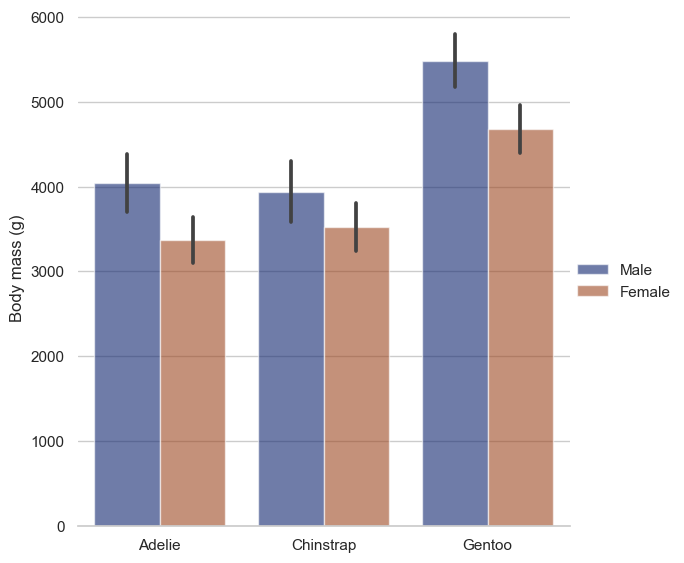

In [118]:
import seaborn as sns
sns.set_theme(style="whitegrid")

penguins = sns.load_dataset("penguins")

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=penguins, kind="bar",
    x="species", y="body_mass_g", hue="sex",
    errorbar="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)            #그래프밖에 외곽선 
g.set_axis_labels("", "Body mass (g)")
g.legend.set_title("")

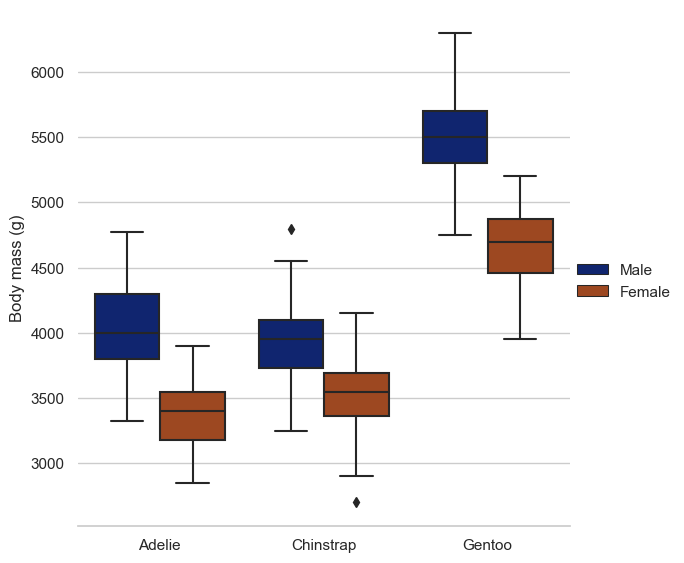

In [14]:
import seaborn as sns
sns.set_theme(style="whitegrid")

penguins = sns.load_dataset("penguins")

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=penguins, kind="box",
    x="species", y="body_mass_g", hue="sex",
    errorbar="sd", palette="dark", height=6
)
g.despine(left=True)            #그래프밖에 외곽선 
g.set_axis_labels("", "Body mass (g)")
g.legend.set_title("")

In [120]:
penguins.head(2)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female


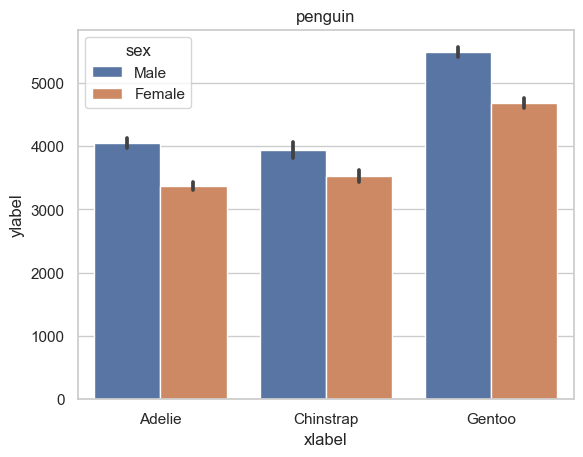

In [121]:
sns.barplot(data=penguins, x='species', y='body_mass_g', hue='sex')
plt.xlabel('xlabel')
plt.ylabel('ylabel')
plt.title('penguin')

plt.show()

NameError: name 'plt' is not defined

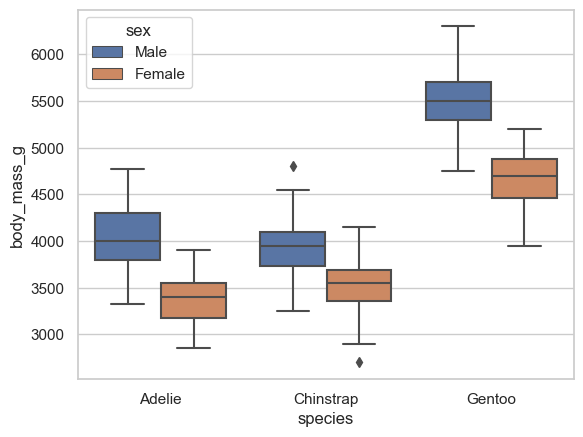

In [15]:
sns.boxplot(data=penguins, x='species', y='body_mass_g', hue='sex')
plt.xlabel('xlabel')
plt.ylabel('ylabel')
plt.title('penguin')

plt.show()

## 실습
1. 평균 마력 이상/미만인 대상을 구분해서 두 그룹의 차이가 있는지 통계검정과 시각화를 해주세요

In [16]:
mpg = sns.load_dataset('mpg')

In [17]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [125]:
mpg['horsepower'].mean()

104.46938775510205

In [126]:
mpg['hpmeanup'] = mpg['horsepower'] > mpg['horsepower'].mean()

In [127]:
mpg[mpg['hpmeanup']]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,hpmeanup
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,True
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,True
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,True
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,True
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,True
...,...,...,...,...,...,...,...,...,...,...
362,24.2,6,146.0,120.0,2930,13.8,81,japan,datsun 810 maxima,True
363,22.4,6,231.0,110.0,3415,15.8,81,usa,buick century,True
364,26.6,8,350.0,105.0,3725,19.0,81,usa,oldsmobile cutlass ls,True
386,25.0,6,181.0,110.0,2945,16.4,82,usa,buick century limited,True


In [128]:
stats.ks_2samp(mpg.columns['horsepower'], mpg.columns['hpmeanup'])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

<Axes: xlabel='mpg', ylabel='hpmeanup'>

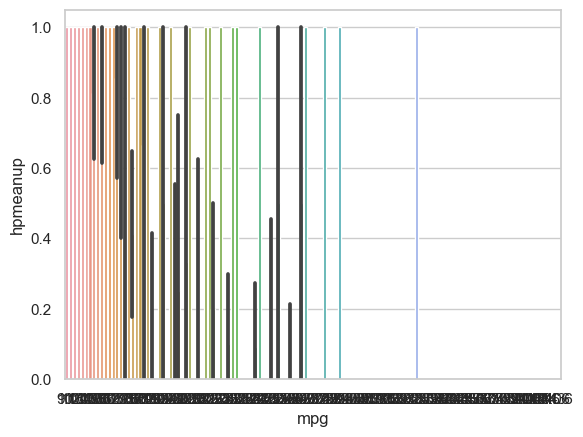

In [129]:
sns.barplot(data=mpg, x='mpg', y='hpmeanup')

# 풀이 

In [18]:
m = mpg['horsepower'] >= mpg['horsepower'].mean()

In [19]:
mpg[m] 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
362,24.2,6,146.0,120.0,2930,13.8,81,japan,datsun 810 maxima
363,22.4,6,231.0,110.0,3415,15.8,81,usa,buick century
364,26.6,8,350.0,105.0,3725,19.0,81,usa,oldsmobile cutlass ls
386,25.0,6,181.0,110.0,2945,16.4,82,usa,buick century limited


In [20]:
mpg[-m] 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
14,24.0,4,113.0,95.0,2372,15.0,70,japan,toyota corona mark ii
15,22.0,6,198.0,95.0,2833,15.5,70,usa,plymouth duster
16,18.0,6,199.0,97.0,2774,15.5,70,usa,amc hornet
17,21.0,6,200.0,85.0,2587,16.0,70,usa,ford maverick
18,27.0,4,97.0,88.0,2130,14.5,70,japan,datsun pl510
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [133]:
#정규성검성

In [134]:
from scipy import stats

In [21]:
d1 =mpg[m]['horsepower']
d2 = mpg[-m]['horsepower']

In [22]:
d1

0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
       ...  
362    120.0
363    110.0
364    105.0
386    110.0
389    112.0
Name: horsepower, Length: 148, dtype: float64

In [136]:
d2

14     95.0
15     95.0
16     97.0
17     85.0
18     88.0
       ... 
393    86.0
394    52.0
395    84.0
396    79.0
397    82.0
Name: horsepower, Length: 250, dtype: float64

In [137]:
stats.shapiro(d1)           # 정규성을 만족하지않음

ShapiroResult(statistic=0.9209045171737671, pvalue=2.833129997270589e-07)

In [138]:
stats.shapiro(d2)           # 정규성을 만족한다 . 

ShapiroResult(statistic=nan, pvalue=1.0)

In [139]:
stats.ks_2samp(d1,d2)     # ks_2samp 통계량 계산  이자료형에선 굳이x

KstestResult(statistic=0.976, pvalue=9.14469611185519e-103, statistic_location=103.0, statistic_sign=-1)

In [140]:
stats.mannwhitneyu(d1, d2)  # 순위합 검정 

MannwhitneyuResult(statistic=nan, pvalue=nan)

In [141]:
stats.ttest_ind(d1, d2) # 두 집단의 평균이 같은지 파악

Ttest_indResult(statistic=nan, pvalue=nan)

In [142]:
d1.unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
       113., 200., 210., 193., 105., 175., 153., 180., 110., 208., 155.,
       112., 145., 137., 158., 167., 107., 230., 122., 148., 129., 115.,
       120., 152., 108., 149., 139., 125., 133., 138., 135., 142., 132.,
       116.])

In [143]:
d2.unique()           # nan값이있음

array([ 95.,  97.,  85.,  88.,  46.,  87.,  90.,  nan, 100.,  72.,  86.,
        70.,  76.,  65.,  69.,  60.,  80.,  54.,  92.,  94.,  49.,  75.,
        91.,  67.,  83.,  78.,  52.,  61.,  93.,  96.,  71.,  98.,  53.,
        81.,  79., 102.,  68.,  58.,  89.,  63.,  48.,  66., 103.,  77.,
        62.,  84.,  64.,  74.,  82.])

In [144]:
d2.fillna(d2.median(), inplace=True) # nan값을채운다 중간값으로

C:\Users\kpes2\AppData\Local\Temp\ipykernel_27408\1735374977.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2.fillna(d2.median(), inplace=True) # nan값을채운다 중간값으로


In [145]:
d2.unique()

array([ 95. ,  97. ,  85. ,  88. ,  46. ,  87. ,  90. ,  82.5, 100. ,
        72. ,  86. ,  70. ,  76. ,  65. ,  69. ,  60. ,  80. ,  54. ,
        92. ,  94. ,  49. ,  75. ,  91. ,  67. ,  83. ,  78. ,  52. ,
        61. ,  93. ,  96. ,  71. ,  98. ,  53. ,  81. ,  79. , 102. ,
        68. ,  58. ,  89. ,  63. ,  48. ,  66. , 103. ,  77. ,  62. ,
        84. ,  64. ,  74. ,  82. ])

In [146]:
stats.mannwhitneyu(d1, d2)         # 두그룹간에 차이가난다 

MannwhitneyuResult(statistic=37000.0, pvalue=1.6636479260185042e-62)

In [147]:
stats.ttest_ind(d1, d2)

Ttest_indResult(statistic=28.043542427958233, pvalue=4.209107348728462e-96)

<Axes: xlabel='horsepower', ylabel='horsepower'>

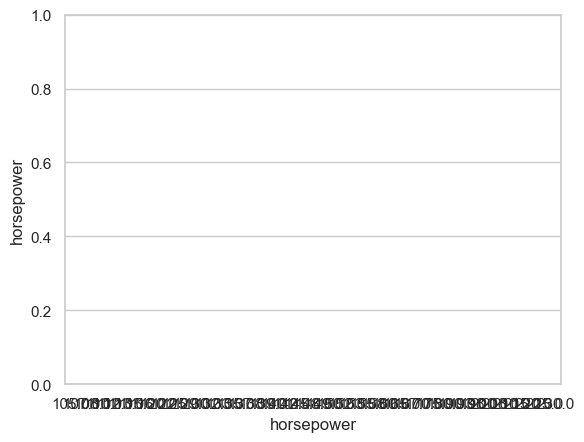

In [148]:
sns.boxplot(x =d1,y =d2)

In [149]:
mpg['category'] = m

In [150]:
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,hpmeanup,category
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,True,True
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,True,True
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,True,True
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,True,True
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,True,True
...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl,False,False
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup,False,False
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage,False,False
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger,False,False


In [151]:
mpg['category'] = mpg['category'].apply(lambda x: 'over' if x else 'under')

In [152]:
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,hpmeanup,category
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,True,over
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,True,over
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,True,over
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,True,over
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,True,over
...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl,False,under
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup,False,under
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage,False,under
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger,False,under


<Axes: xlabel='category', ylabel='horsepower'>

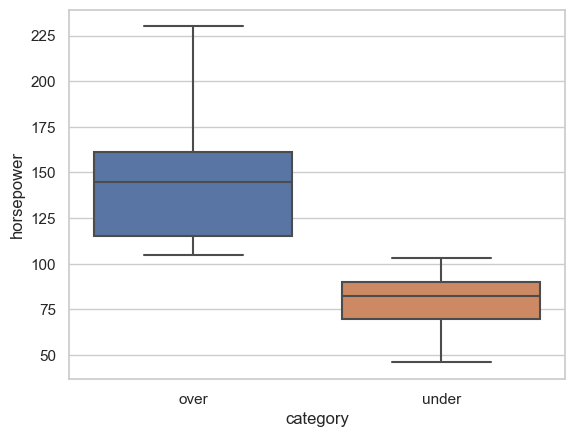

In [153]:
sns.boxplot(data=mpg, x='category',y='horsepower')

<Axes: xlabel='category', ylabel='horsepower'>

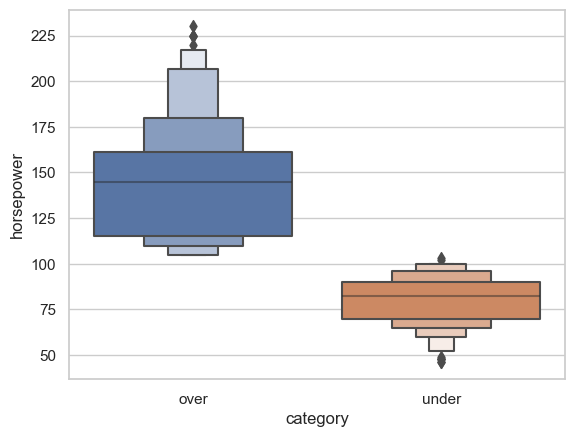

In [154]:
sns.boxenplot(data=mpg, x='category',y='horsepower')

<Axes: xlabel='category', ylabel='horsepower'>

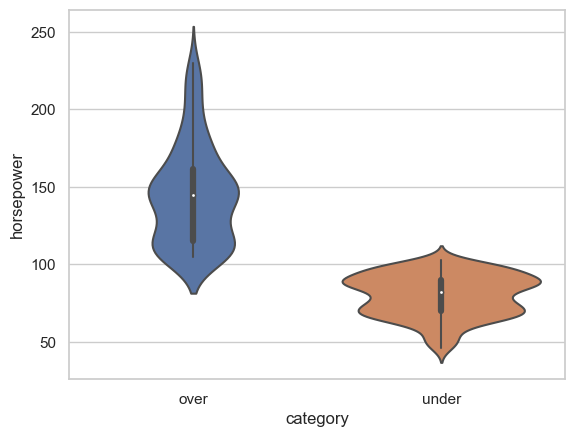

In [155]:
sns.violinplot(data=mpg, x='category',y='horsepower') 

<Axes: xlabel='category', ylabel='horsepower'>

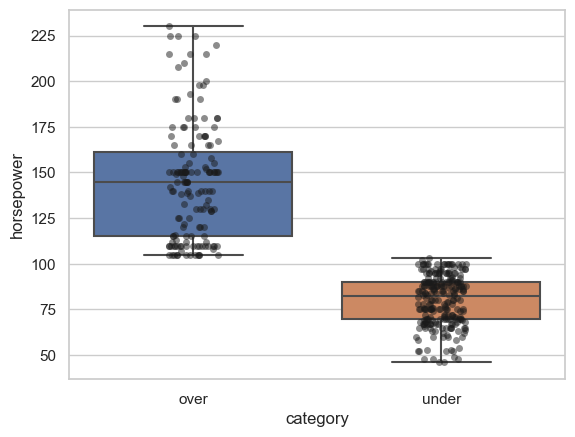

In [156]:
sns.boxplot(data=mpg, x='category',y='horsepower')
sns.stripplot(data=mpg, x='category',y='horsepower', color='k',alpha=.5) 

In [157]:
import statannot

In [158]:
! pip install statannot

Defaulting to user installation because normal site-packages is not writeable


In [159]:
from statannot import add_stat_annotation            

<Axes: xlabel='category', ylabel='horsepower'>

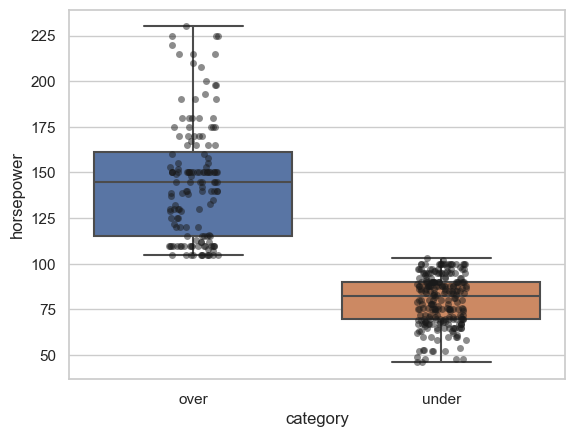

In [160]:
sns.boxplot(data=mpg, x='category',y='horsepower')
sns.stripplot(data=mpg, x='category',y='horsepower', color='k',alpha=.5) 

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

over v.s. under: t-test independent samples with Bonferroni correction, P_val=2.847e-94 stat=2.773e+01


(<Axes: xlabel='category', ylabel='horsepower'>,
 [<statannot.StatResult.StatResult at 0x1edd62bea10>])

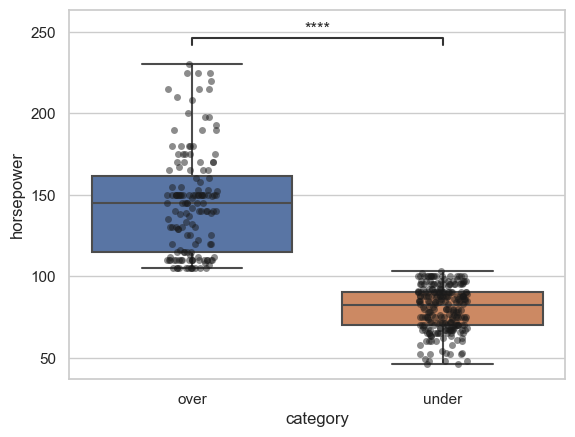

In [161]:
f1 = sns.boxplot(data=mpg, x='category',y='horsepower')
f2 = sns.stripplot(data=mpg, x='category',y='horsepower', color='k',alpha=.5) 

add_stat_annotation(f1, data=mpg, x='category', y='horsepower',
                   box_pairs=[(('over'),('under'))],
                    test='t-test_ind', text_format='star',
                    loc='inside', verbose=2)                                  # f1을기준으로잡음 

In [162]:
# user_df: 입력할 데이터프레임 이름
# col : x축 column 이름 'category'
# value : y축 value 이름 'horsepower'
# group1, group2 : col 기준으로 분류된 이름  ' over', 'under'

def ttest_auto(user_df, col, value, group1, group2):

    f1 = sns.boxplot(data=user_df, x=col,y=value)
    f2 = sns.stripplot(data=user_df, x=col,y=value, color='k',alpha=.5) 

    add_stat_annotation(f1, data=user_df, x=col, y=value,
               box_pairs=[((group1),(group2))],
                    test='t-test_ind', text_format='star',
                    loc='inside', verbose=2)     
    plt.show()

# penguins 데이터프레임에서 adelie와 Gentoo의 체중 차이가 나는지 ttest_auto함수를 이용해서 표현해보기

In [163]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [164]:
penguins['body_mass_g'].unique()

array([3750., 3800., 3250.,   nan, 3450., 3650., 3625., 4675., 3475.,
       4250., 3300., 3700., 3200., 4400., 4500., 3325., 4200., 3400.,
       3600., 3950., 3550., 3150., 3900., 4150., 4650., 3100., 3000.,
       4600., 3425., 2975., 3500., 4300., 4050., 2900., 2850., 3350.,
       4100., 3050., 4450., 4000., 4700., 4350., 3725., 4725., 3075.,
       2925., 3175., 4775., 3825., 4275., 4075., 3775., 3875., 3275.,
       4475., 3975., 3525., 3575., 4550., 3850., 4800., 2700., 3675.,
       5700., 5400., 5200., 5150., 5550., 5850., 6300., 5350., 5000.,
       5050., 5100., 5650., 5250., 6050., 4950., 4750., 4900., 5300.,
       4850., 5800., 6000., 5950., 4625., 5450., 5600., 4875., 4925.,
       4975., 5500., 4575., 4375., 5750.])

In [165]:
penguins.fillna(d2.mean(), inplace=True)

In [166]:
penguins['body_mass_g'].unique()

array([3750.  , 3800.  , 3250.  ,   80.14, 3450.  , 3650.  , 3625.  ,
       4675.  , 3475.  , 4250.  , 3300.  , 3700.  , 3200.  , 4400.  ,
       4500.  , 3325.  , 4200.  , 3400.  , 3600.  , 3950.  , 3550.  ,
       3150.  , 3900.  , 4150.  , 4650.  , 3100.  , 3000.  , 4600.  ,
       3425.  , 2975.  , 3500.  , 4300.  , 4050.  , 2900.  , 2850.  ,
       3350.  , 4100.  , 3050.  , 4450.  , 4000.  , 4700.  , 4350.  ,
       3725.  , 4725.  , 3075.  , 2925.  , 3175.  , 4775.  , 3825.  ,
       4275.  , 4075.  , 3775.  , 3875.  , 3275.  , 4475.  , 3975.  ,
       3525.  , 3575.  , 4550.  , 3850.  , 4800.  , 2700.  , 3675.  ,
       5700.  , 5400.  , 5200.  , 5150.  , 5550.  , 5850.  , 6300.  ,
       5350.  , 5000.  , 5050.  , 5100.  , 5650.  , 5250.  , 6050.  ,
       4950.  , 4750.  , 4900.  , 5300.  , 4850.  , 5800.  , 6000.  ,
       5950.  , 4625.  , 5450.  , 5600.  , 4875.  , 4925.  , 4975.  ,
       5500.  , 4575.  , 4375.  , 5750.  ])

In [167]:
m = penguins['species'] =='Adelie'

In [168]:
m2 = penguins['species'] == 'Gentoo'

# 풀이

In [169]:
penguins['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [170]:
penguins['body_mass_g'] =[penguins['body_mass_g'].median() if w != w else w for w in penguins['body_mass_g']]

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Adelie v.s. Gentoo: t-test independent samples with Bonferroni correction, P_val=2.382e-50 stat=-1.856e+01


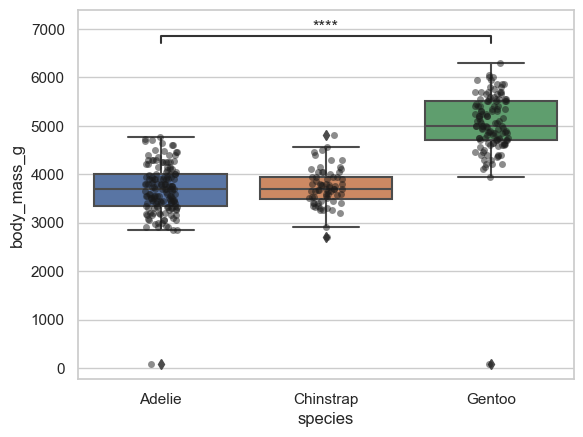

In [171]:
#ttest_auto()
ttest_auto(penguins, 'species', 'body_mass_g', 'Adelie', 'Gentoo')

In [172]:
penguins['body_mass_g']

0      3750.00
1      3800.00
2      3250.00
3        80.14
4      3450.00
        ...   
339      80.14
340    4850.00
341    5750.00
342    5200.00
343    5400.00
Name: body_mass_g, Length: 344, dtype: float64

In [173]:
penguins['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [174]:
#penguins['body_mass_g']

d1 = penguins[penguins['species'] == 'Aelie']['body_mass_g']
d2 = penguins[penguins['species'] == 'Chinstrap']['body_mass_g']
d3 = penguins[penguins['species'] == 'Gentoo']['body_mass_g']

In [175]:
r1 = stats.ttest_ind(d1, d2)
r2 = stats.ttest_ind(d1, d3)
r3 = stats.ttest_ind(d2, d3)

In [176]:
print(r1)
print(r2)
print(r3)

Ttest_indResult(statistic=nan, pvalue=nan)
Ttest_indResult(statistic=nan, pvalue=nan)
Ttest_indResult(statistic=-14.68486040800477, pvalue=4.026442916184238e-33)


In [177]:
[i*3 for i in [r1.pvalue, r2.pvalue, r3.pvalue]]

[nan, nan, 1.2079328748552713e-32]

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Adelie v.s. Chinstrap: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=-7.713e-01
Chinstrap v.s. Gentoo: t-test independent samples with Bonferroni correction, P_val=1.208e-32 stat=-1.468e+01
Adelie v.s. Gentoo: t-test independent samples with Bonferroni correction, P_val=7.145e-50 stat=-1.856e+01


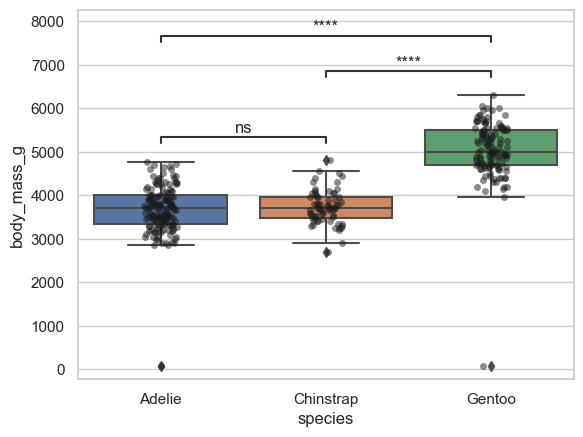

In [178]:
    f1 = sns.boxplot(data=penguins, x='species',y='body_mass_g')
    f2 = sns.stripplot(data=penguins, x='species',y='body_mass_g', color='k',alpha=.5) 

    add_stat_annotation(f1, data=penguins, x='species', y='body_mass_g',
               box_pairs=[(('Adelie'),('Chinstrap')),(('Adelie'),('Gentoo')),(('Chinstrap'),('Gentoo'))],
                    test='t-test_ind', text_format='star',
                    loc='inside', verbose=2)     
    plt.show()